# COURSE: A deep understanding of deep learning
## SECTION: Math prerequisites
### LECTURE: Softmax
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202401

In [2]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [3]:
# import libraries
import numpy as np
import torch #Importing pytorch library
import torch.nn as nn #Importing neural network library
import matplotlib.pyplot as plt

In [4]:
# "manually" in numpy

# the list of numbers
z = [1,2,3]

# compute the softmax result (ez(i)/sigma e(z) )
num = np.exp(z) #Goes through each z to do it
den = np.sum( np.exp(z) )
sigma = num / den #(calculates sigma for each element i in z)

print(sigma)
print(np.sum(sigma))

[0.09003057 0.24472847 0.66524096]
1.0


[ 5  3  9 12 -4 -2 10 -1 13  9  2  1 13  5 -2  1 -2 10 -3  0  2  8  3  1
  6]


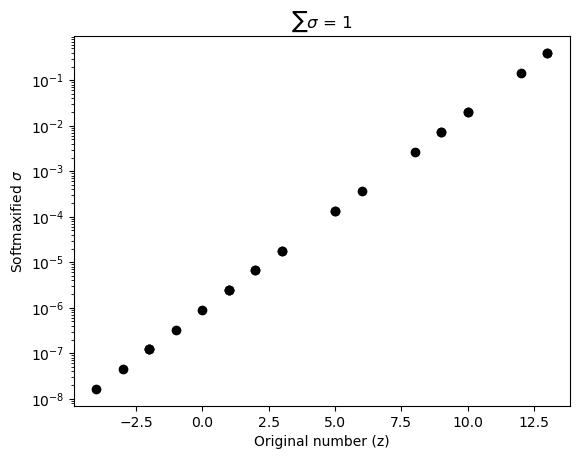

In [5]:
# repeat with some random integers
z = np.random.randint(-5,high=15,size=25)
print(z)

# compute the softmax result
num = np.exp(z)
den = np.sum( num )
sigma = num / den

# compare
plt.plot(z, sigma, 'ko') #'ko': A format string where 'k' stands for black color (k from CMYK color model) and 'o' indicates that the points should be marked as circles.
plt.xlabel('Original number (z)') 
plt.ylabel('Softmaxified $\\sigma$')  # Doubled backslash alogn with the Latex notation.#The %g is a placeholder for a floating-point number.
plt.yscale('log')
plt.title('$\\sum\\sigma$ = %g' % np.sum(sigma))  # Doubled backslash
plt.show()


# Using pytorch

In [6]:
# slightly more involved using torch.nn

# create an instance of the softmax activation class
softfun = nn.Softmax(dim=0)

# then apply the data to that function
sigmaT = softfun( torch.Tensor(z) )

# now we get the results
print(sigmaT)

tensor([1.3351e-04, 1.8069e-05, 7.2897e-03, 1.4642e-01, 1.6477e-08, 1.2175e-07,
        1.9815e-02, 3.3095e-07, 3.9800e-01, 7.2897e-03, 6.6473e-06, 2.4454e-06,
        3.9800e-01, 1.3351e-04, 1.2175e-07, 2.4454e-06, 1.2175e-07, 1.9815e-02,
        4.4789e-08, 8.9961e-07, 6.6473e-06, 2.6817e-03, 1.8069e-05, 2.4454e-06,
        3.6293e-04])


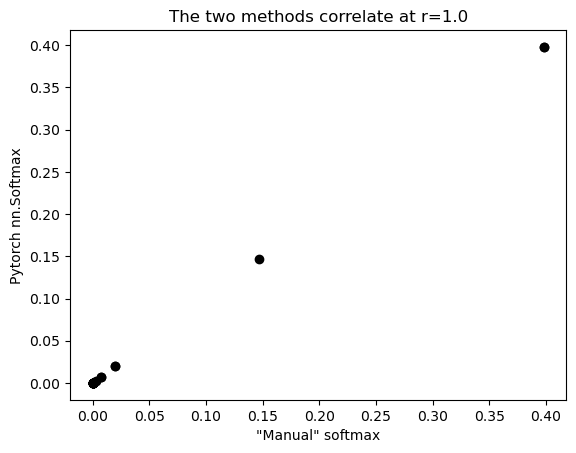

In [7]:
# show that they are the same
plt.plot(sigma,sigmaT,'ko')
plt.xlabel('"Manual" softmax')
plt.ylabel('Pytorch nn.Softmax')
plt.title(f'The two methods correlate at r={np.corrcoef(sigma,sigmaT)[0,1]}')
plt.show()